scatter plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

# import data
df = pd.read_csv("/goinfre/hrami/python/python_for_data/data_jobs.csv")

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



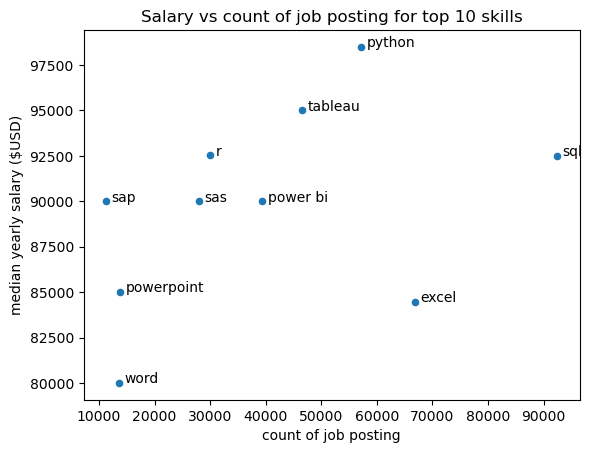

In [33]:
df = df[df['job_title_short'] == "Data Analyst"]
df_exploded =  df.explode('job_skills')
skills_stats = df_exploded.groupby('job_skills').agg(skill_count=('job_skills', 'count'), median_salary=('salary_year_avg', 'median'))
skills_stats =  skills_stats.sort_values(by='skill_count', ascending=False).head(10)
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs count of job posting for top 10 skills')
plt.ylabel('median yearly salary ($USD)')
plt.xlabel('count of job posting')
for i , t in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i]+1000, skills_stats['median_salary'].iloc[i], t)